## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Iso_data_handler import Iso_data_handler
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_trainer import Model_trainer
from ML.utils.Model_evaluator import Model_evaluator

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

In [3]:
iso_handler = Iso_data_handler("C:/Users/antoi/Code/unif/MA2/thesis/data/MIST_v1.2_vvcrit0.0_basic_isos/", 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'])

iso_df = iso_handler.full_iso_data_to_panda()
display(iso_df)

Reading dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


In [4]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1165292,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1165293,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1165294,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1165295,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


In [5]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.099998052173157 - 298.5447575808816
Median value in train data for the mass parameter: 2.0303157509396192
Mean value in train data for the mass parameter: 7.40586868589541
Range in train data for the radius parameter : -2.085171571669866 - 3.1297545143214007
Median value in train data for the radius parameter: 1.4596584609420415
Mean value in train data for the radius parameter: 1.3541629050846133

Testing set statistics:
Range in test data for the mass parameter : 0.0999979840073621 - 293.4041419905409
Median value in test data for the mass parameter: 2.030454857136156
Mean value in test data for the mass parameter: 7.348533474258339
Range in test data for the radius parameter : -2.0845105428478474 - 3.129269620812593
Median value in test data for the radius parameter: 1.462507707853498
Mean value in test data for the radius parameter: 1.3548439682028874

(873972, 4) (291325, 4)
(873972, 2) (291325, 2)


## Model training

### Linear regression

In [13]:
lr_evaluator = Model_evaluator("linear_regression", path="../../../../../results/K_fold/")


Base train data :

mass results:
RVE :  0.3096439817338862
RMSE :  16.85887053207826
MAE :  7.354424088506089
MedAE :  3.8368913764424875
CORR :  0.5564566307293639
MAX_ER :  260.772741014164
Percentiles : 
  75th percentile :  8.624312687483314
  90th percentile :  14.333709320239125
  95th percentile :  18.82121856906355
  99th percentile :  70.18751258588176



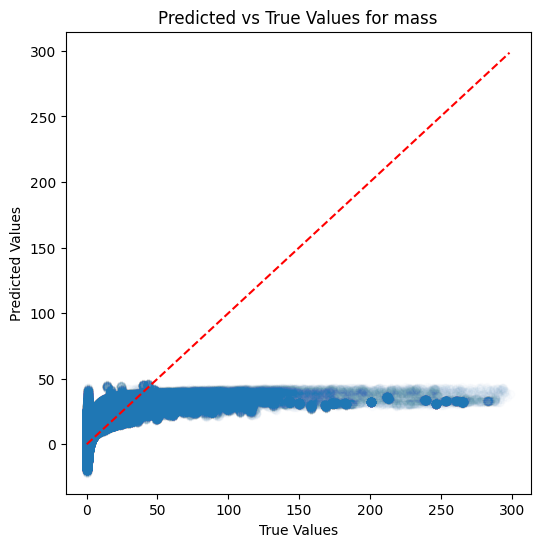

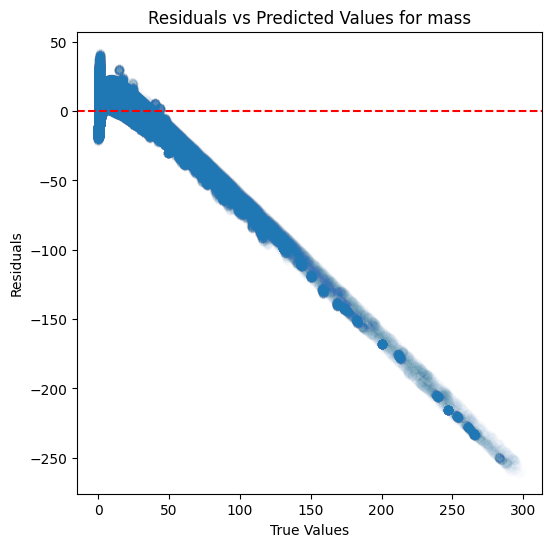

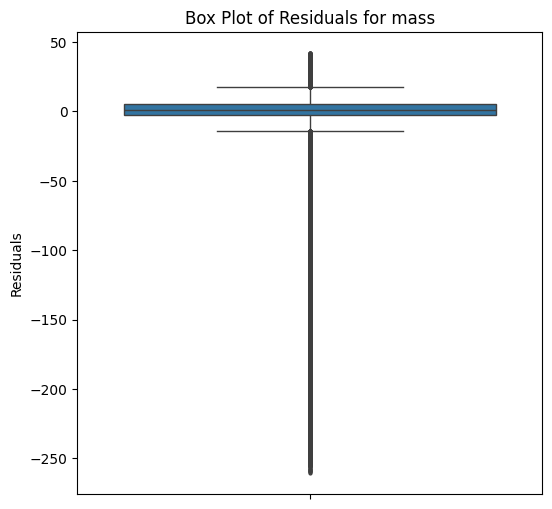

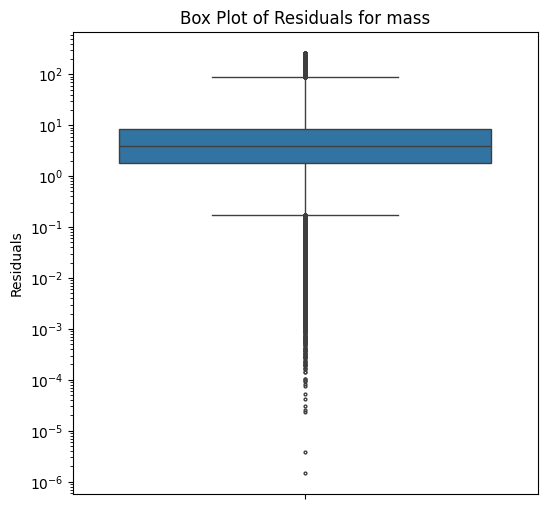

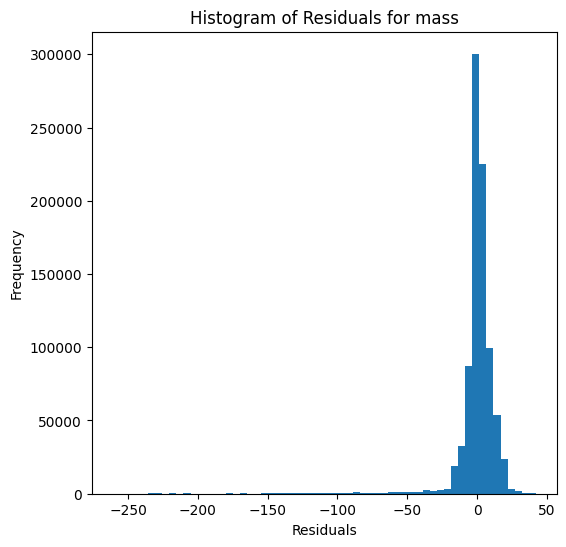

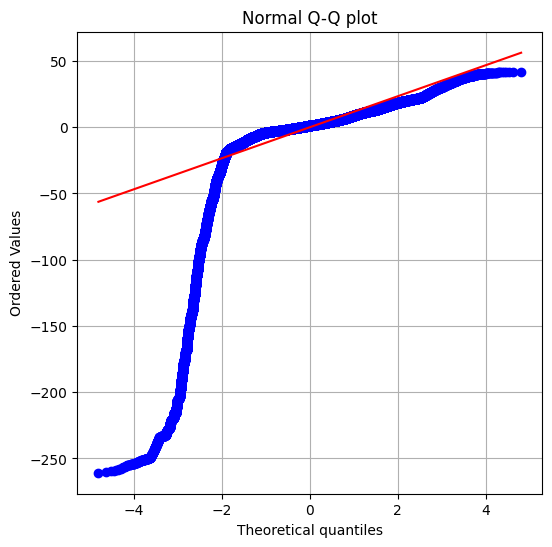


radius results:
RVE :  0.9873587519402774
RMSE :  0.11200873616255912
MAE :  0.0804348003607455
MedAE :  0.05785410657125134
CORR :  0.9936592735642723
MAX_ER :  0.6594269805443154
Percentiles : 
  75th percentile :  0.10395038838287082
  90th percentile :  0.1767039201069619
  95th percentile :  0.24191887639069568
  99th percentile :  0.3820337395142971



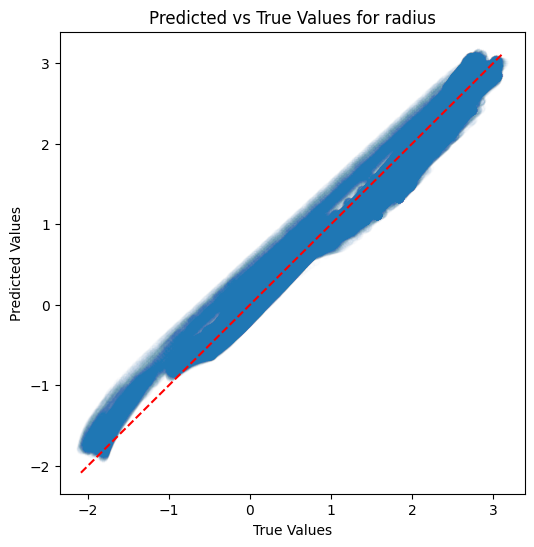

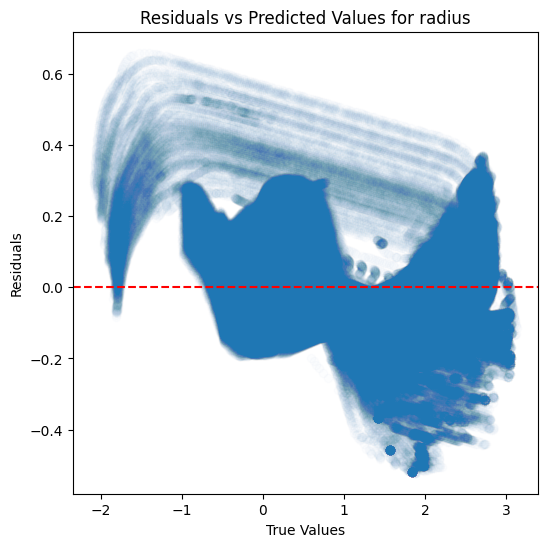

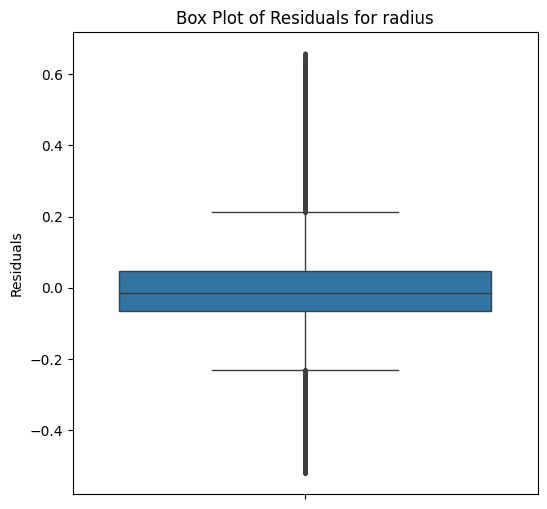

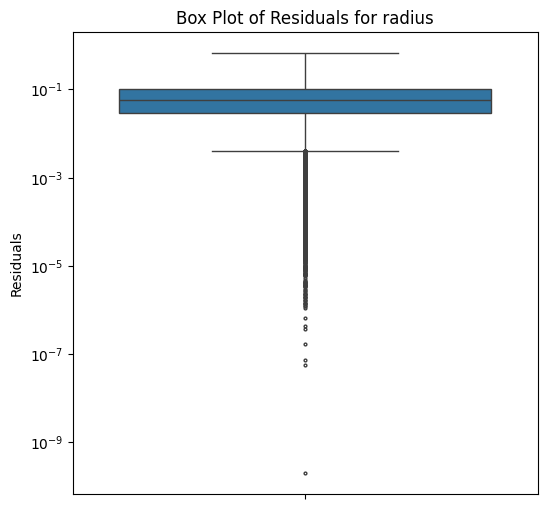

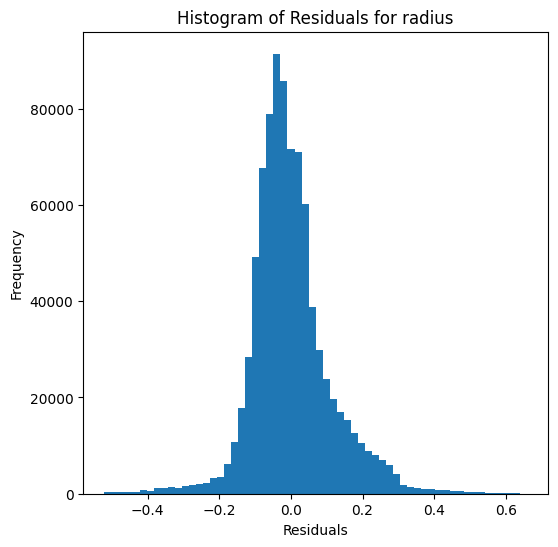

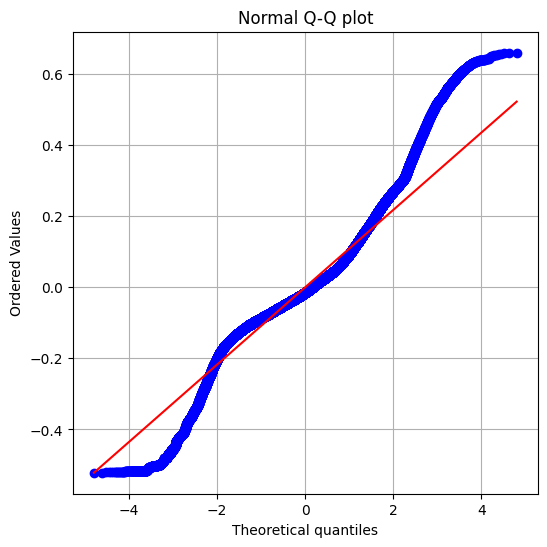

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, "../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True)

### Decision tree

In [6]:
dt_evaluator = Model_evaluator("decision_tree", path="../../../../../results/K_fold/")


Base train data :
../../../../../results/K_fold/decision_tree/Base/metrics.csv
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9948384294082872
RMSE :  1.457749346770917
MAE :  0.13369773242440813
MedAE :  0.00557307728219314
CORR :  0.9974179246693774
MAX_ER :  179.26024624502963
Percentiles : 
  75th percentile :  0.031644550405561134
  90th percentile :  0.1298449116257625
  95th percentile :  0.2684134074503622
  99th percentile :  2.0655390077769122



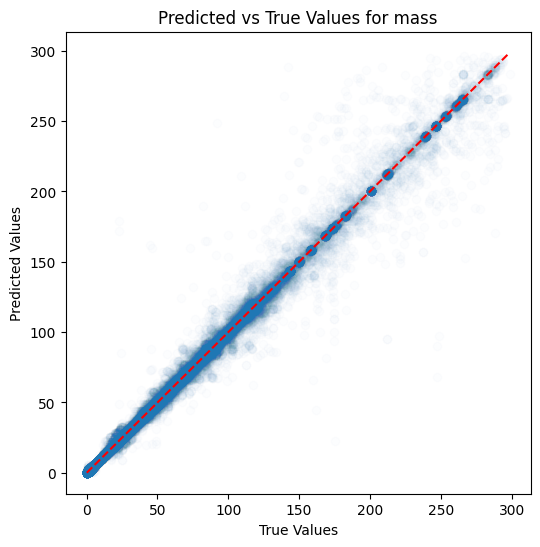

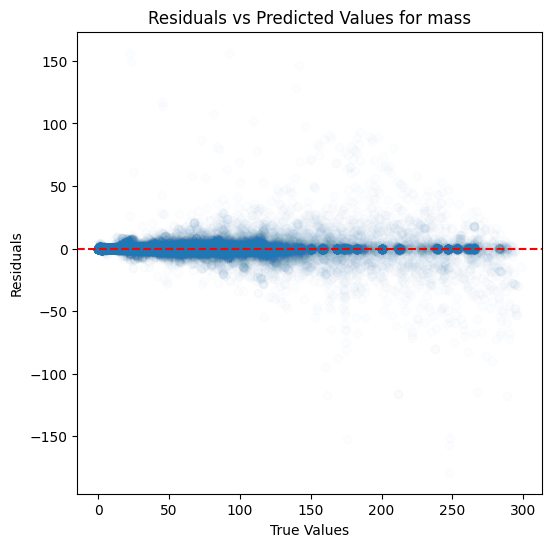

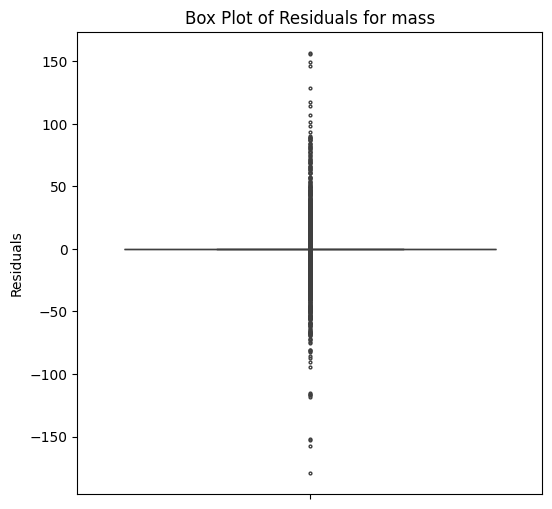

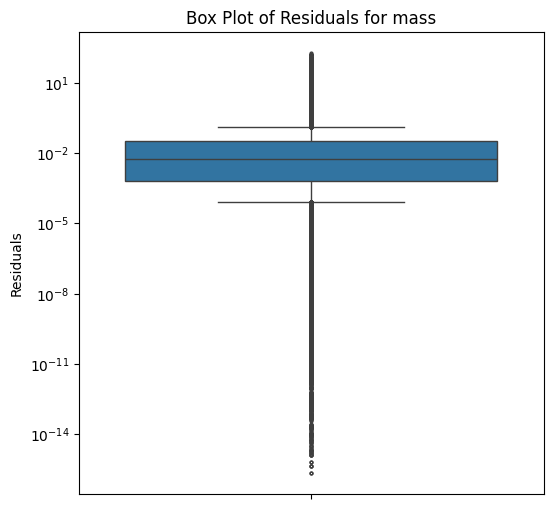

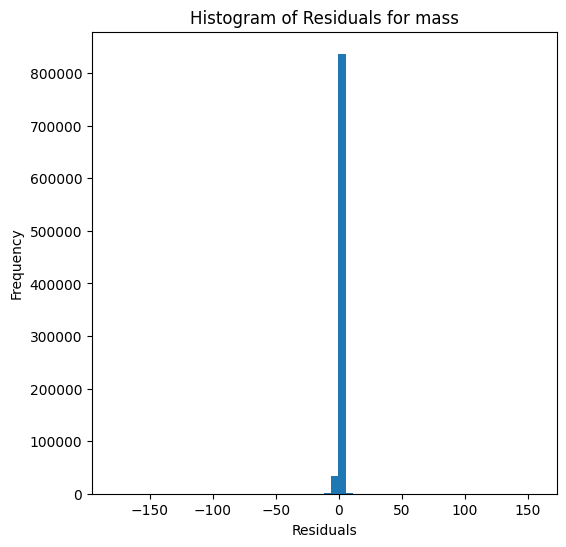

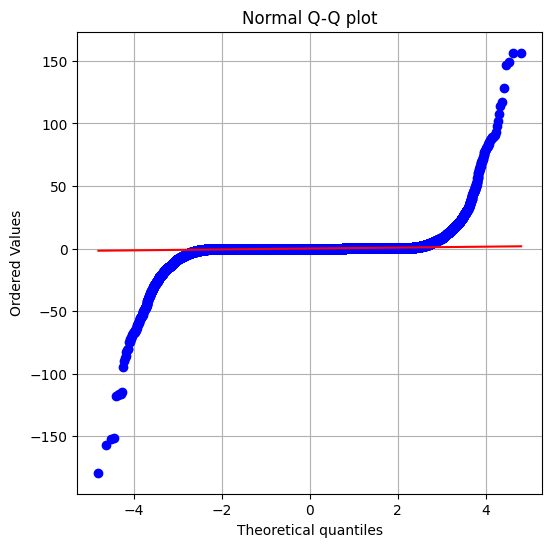


radius results:
RVE :  0.9998085586323131
RMSE :  0.013784167336710375
MAE :  0.007185534135043581
MedAE :  0.0035624236311397883
CORR :  0.9999043112312309
MAX_ER :  0.5192169046615173
Percentiles : 
  75th percentile :  0.008276807958152166
  90th percentile :  0.016424216973006077
  95th percentile :  0.025873599538034586
  99th percentile :  0.05930790416741735



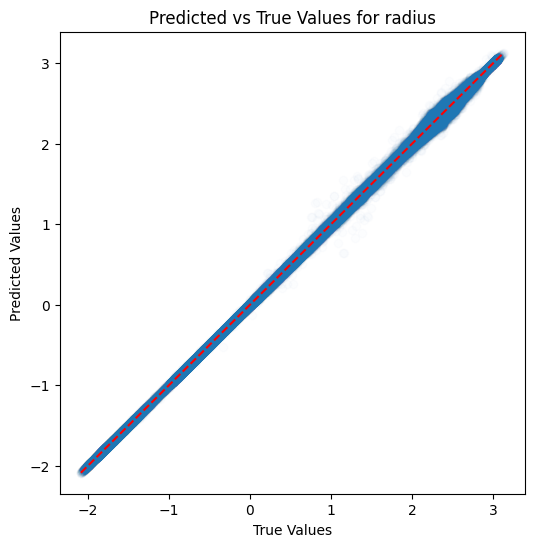

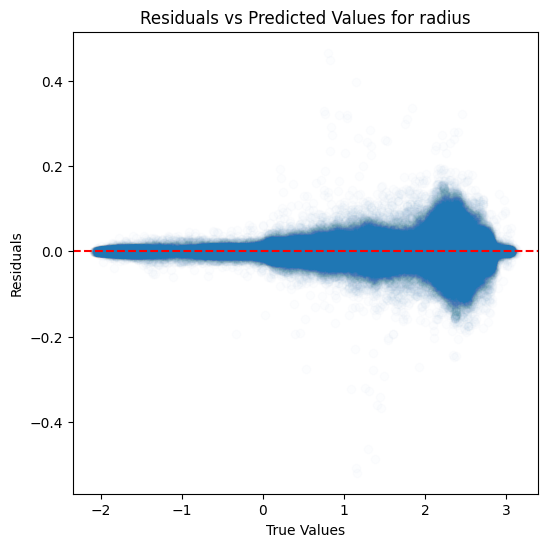

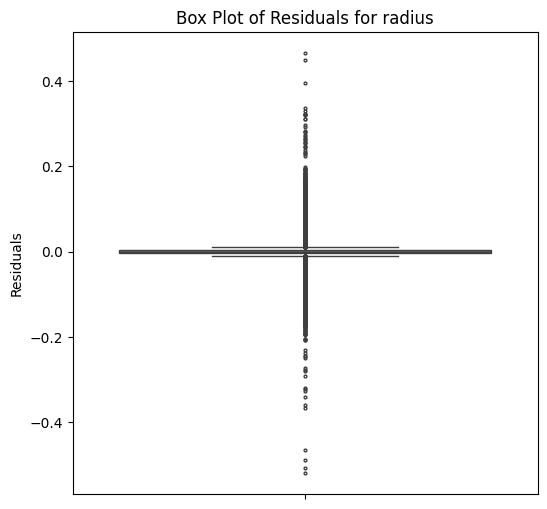

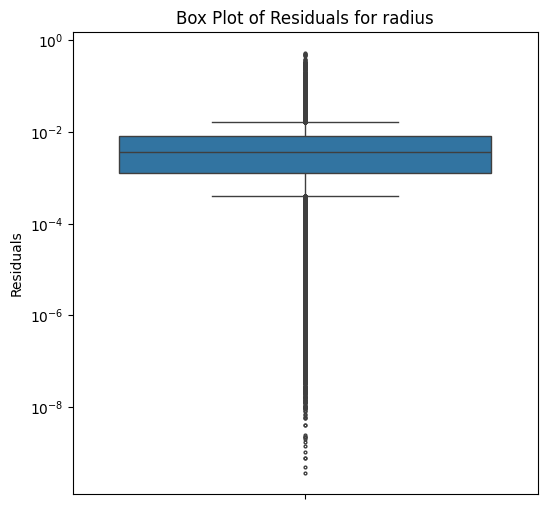

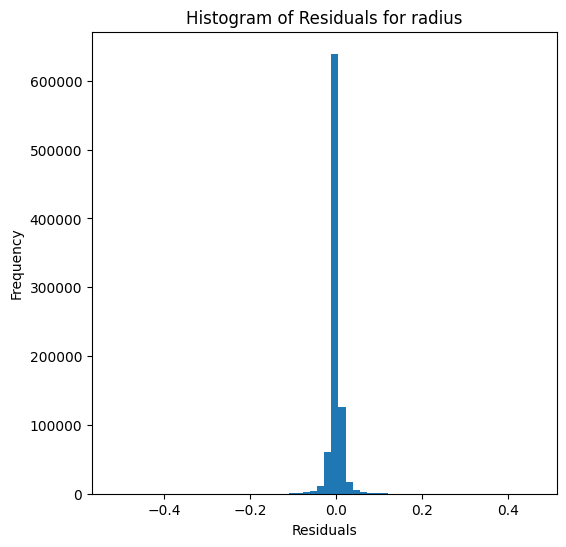

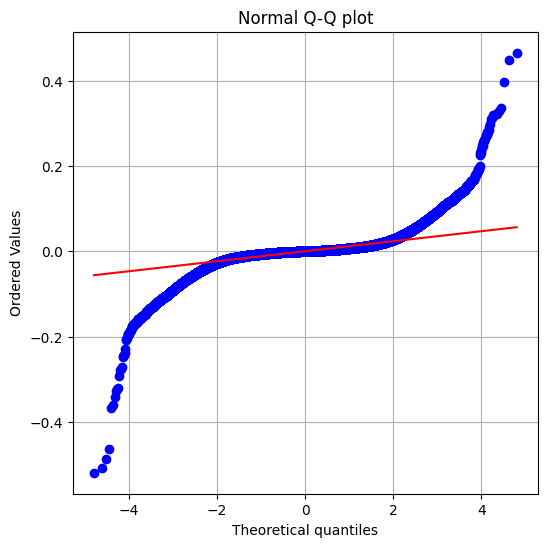

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, "../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True)

### K-nearest neighbours

In [6]:
knn_evaluator = Model_evaluator("KNN", path="../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9905931912134948
RMSE :  1.9681387755851416
MAE :  0.20482660993913326
MedAE :  0.014069573371267186
CORR :  0.9953754949202632
MAX_ER :  128.2238920916907
Percentiles : 
  75th percentile :  0.06438968687443983
  90th percentile :  0.18682689950219572
  95th percentile :  0.35715024230270453
  99th percentile :  3.3691547053437914



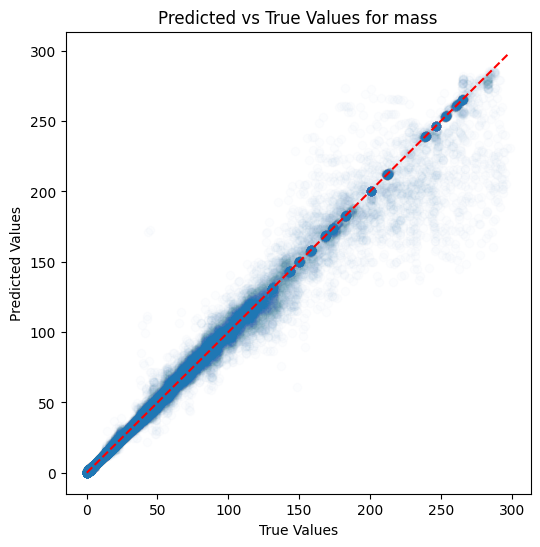

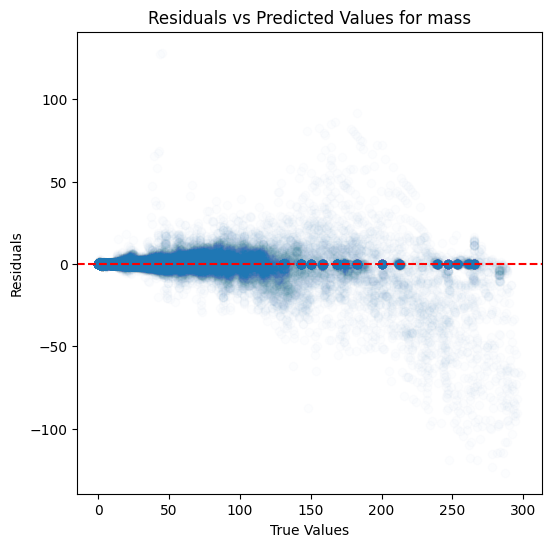

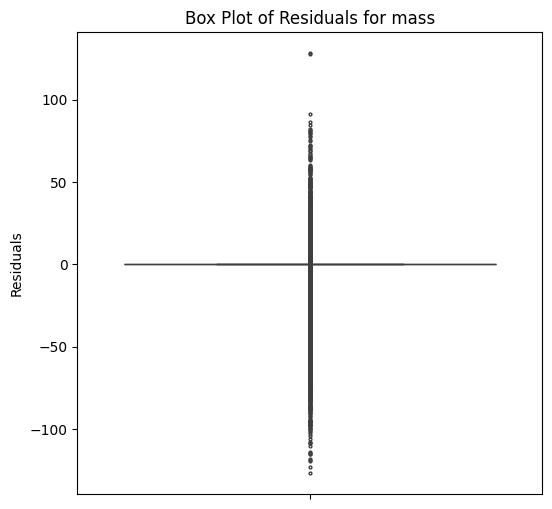

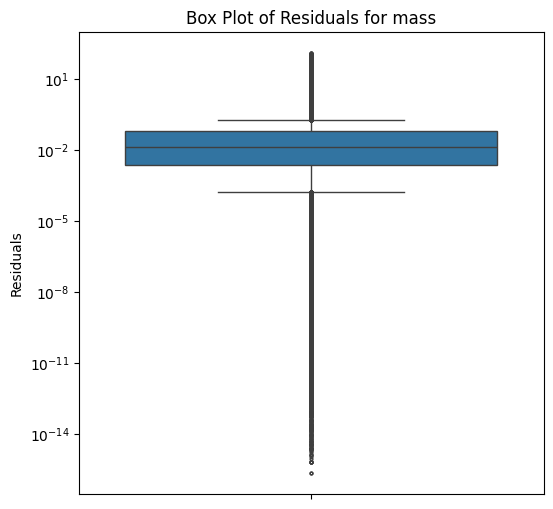

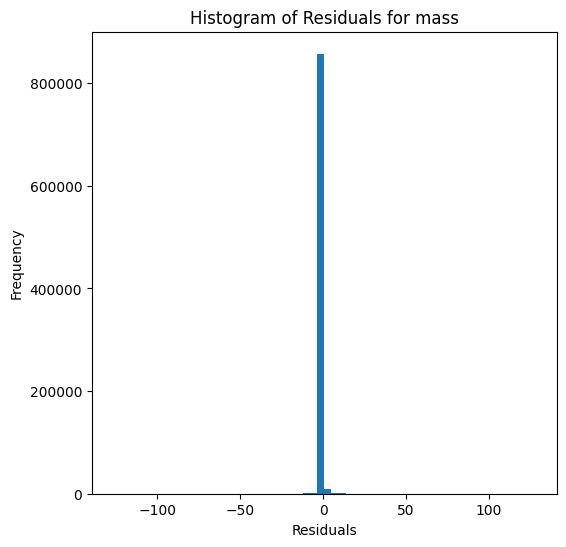

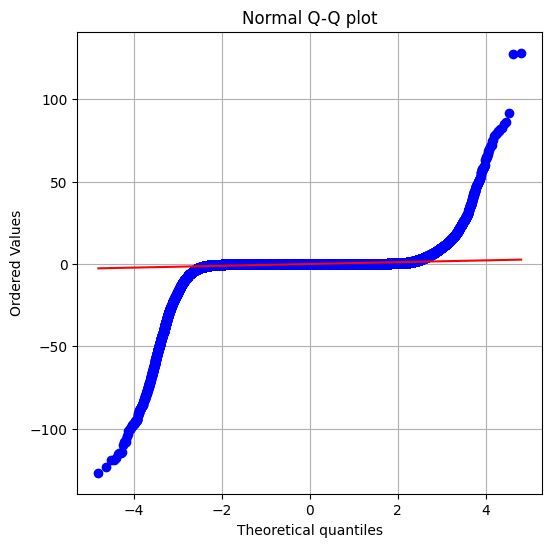


radius results:
RVE :  0.9998524682505924
RMSE :  0.01210091133549416
MAE :  0.006431626922958259
MedAE :  0.00310144223960096
CORR :  0.9999262430656871
MAX_ER :  0.28893637309608644
Percentiles : 
  75th percentile :  0.0072044329939461305
  90th percentile :  0.015325269033916468
  95th percentile :  0.024482395886263015
  99th percentile :  0.05207725395397071



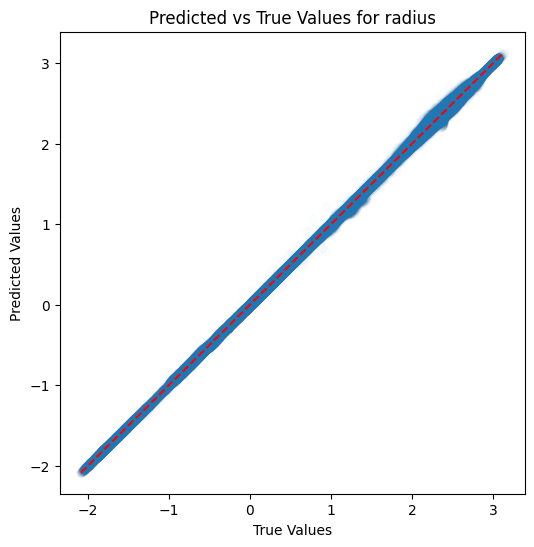

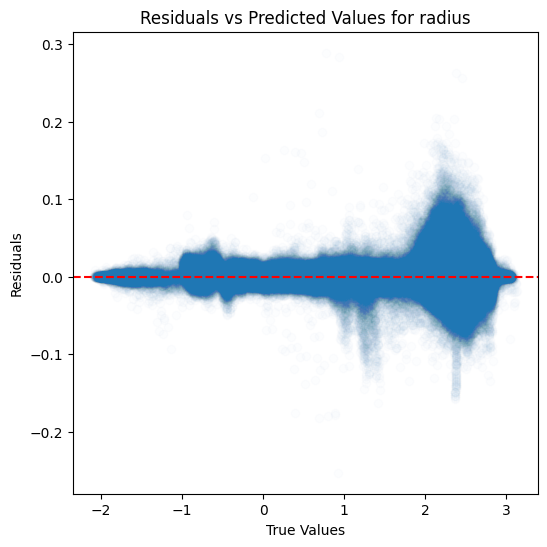

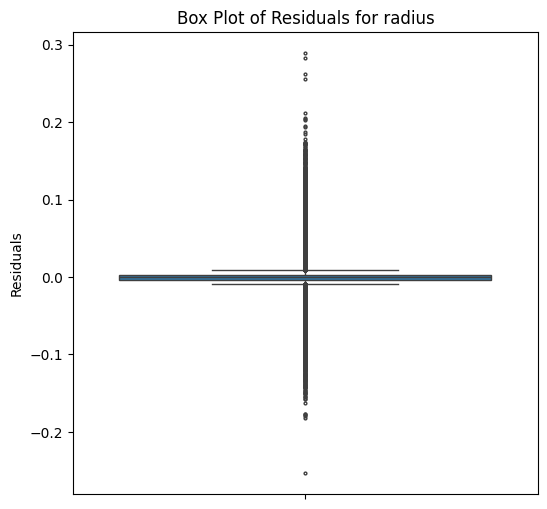

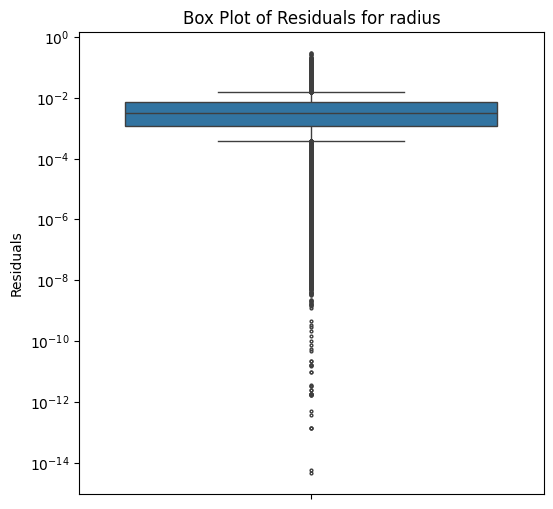

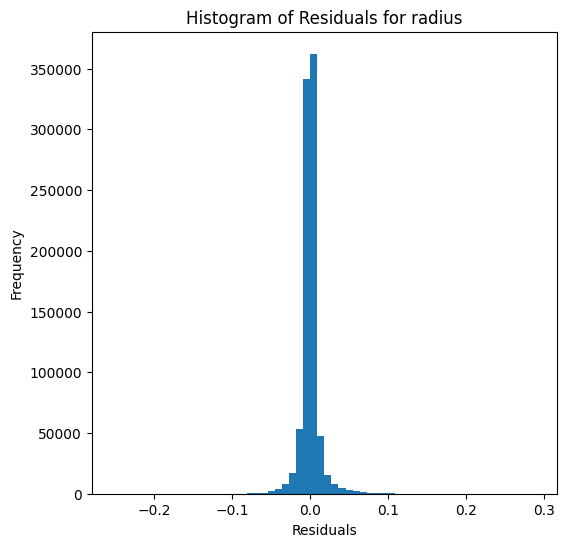

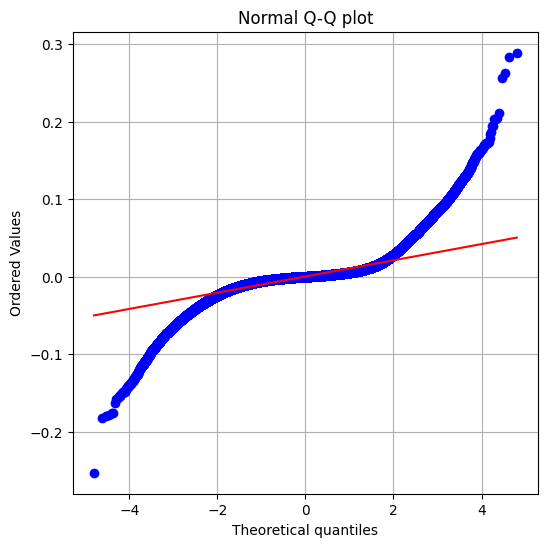

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, "../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True)

### Random forests

In [8]:
rf_evaluator = Model_evaluator("random_forest", path="../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9977940467562483
RMSE :  0.9529946527009437
MAE :  0.09990053187465175
MedAE :  0.008019487149850457
CORR :  0.9988977609553024
MAX_ER :  125.21925500445558
Percentiles : 
  75th percentile :  0.0329959683630586
  90th percentile :  0.10637529054033712
  95th percentile :  0.20459088351898908
  99th percentile :  1.5386217283931427



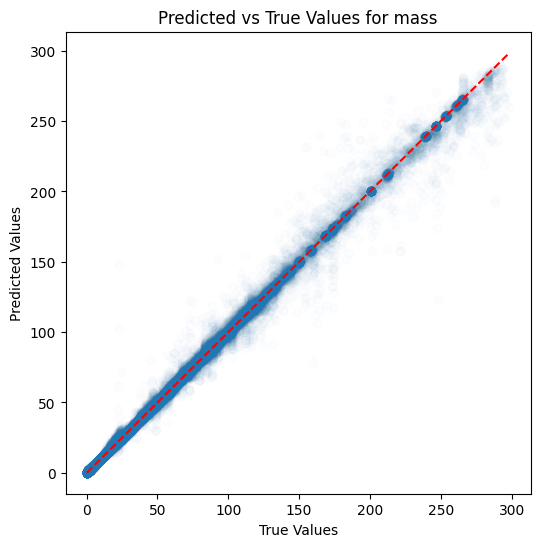

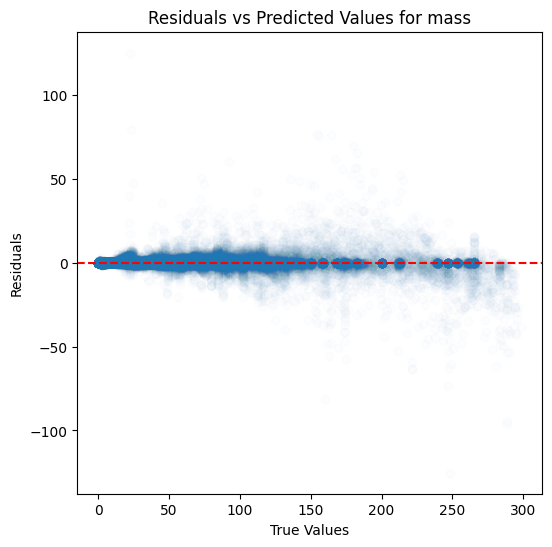

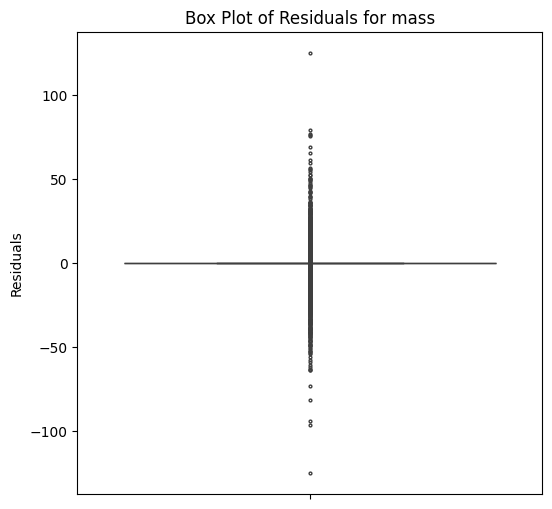

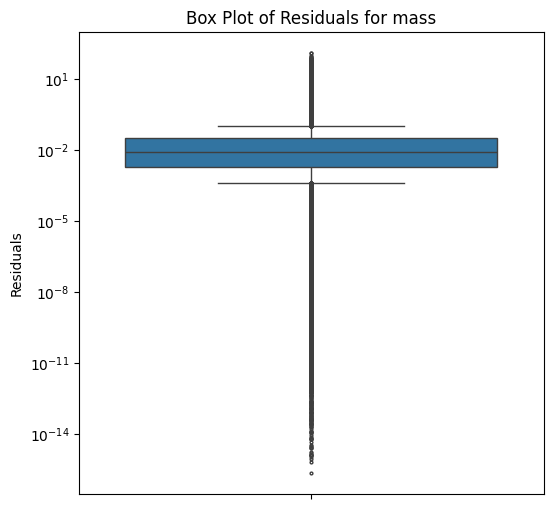

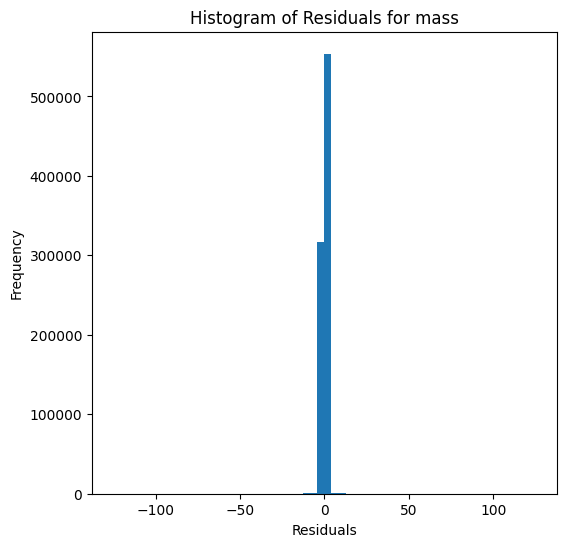

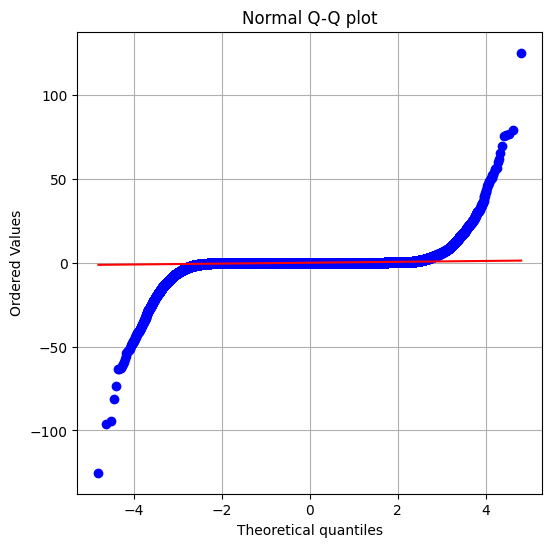


radius results:
RVE :  0.9999138658091802
RMSE :  0.009246215523839234
MAE :  0.004546437889579419
MedAE :  0.0018878644617438822
CORR :  0.999956937498791
MAX_ER :  0.36764590959955445
Percentiles : 
  75th percentile :  0.0049900432130207326
  90th percentile :  0.011172287451150845
  95th percentile :  0.017695198973579292
  99th percentile :  0.04013464550393061



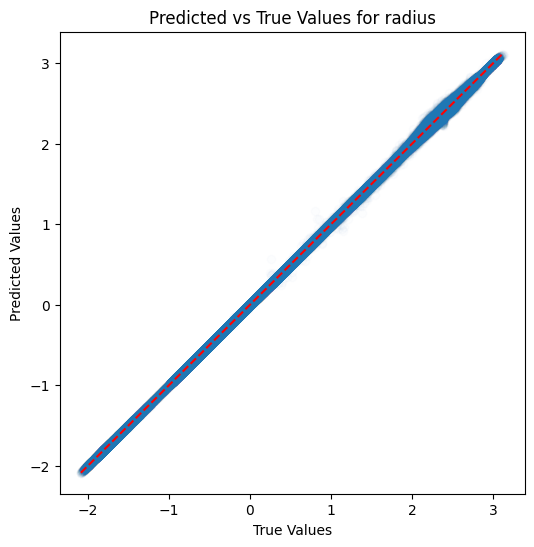

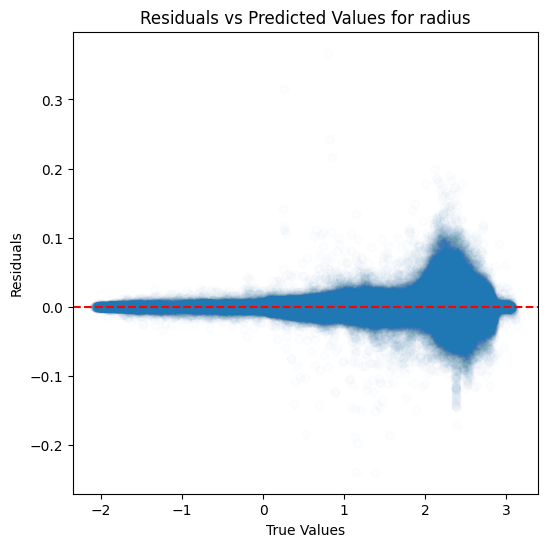

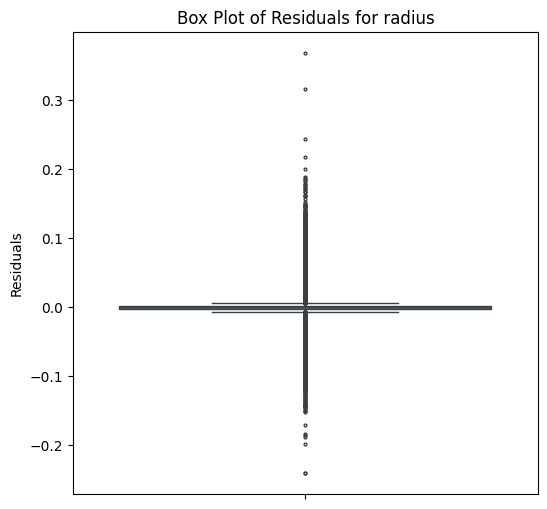

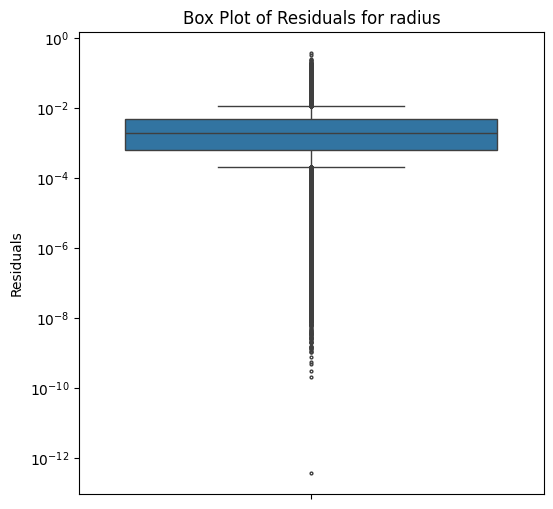

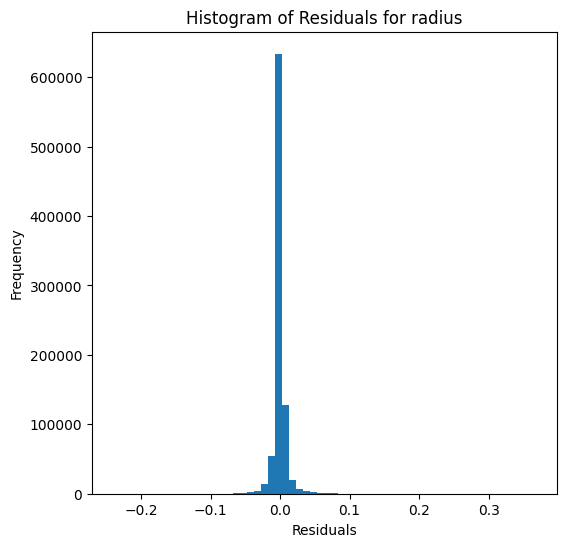

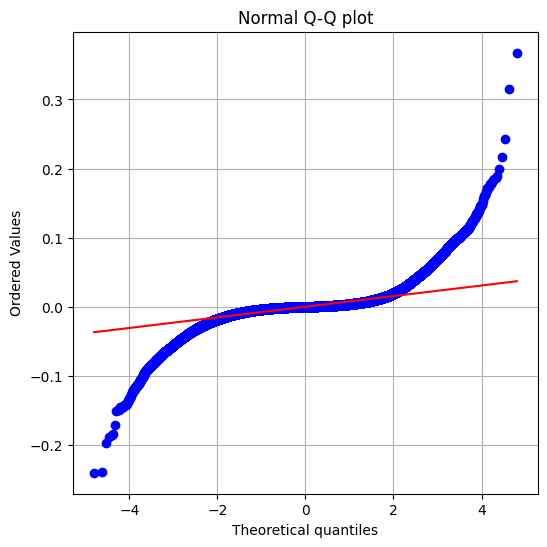

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, "../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True, n_jobs=5)

### XGBoost

In [6]:
xgb_evaluator = Model_evaluator("xgboost", path="../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9929694482759451
RMSE :  1.7013224840647478
MAE :  0.39586139478702637
MedAE :  0.10469884599800827
CORR :  0.9964796009178346
MAX_ER :  109.35920196458784
Percentiles : 
  75th percentile :  0.2512826400517384
  90th percentile :  0.5826810542029814
  95th percentile :  1.2587555213325987
  99th percentile :  5.98770106485794



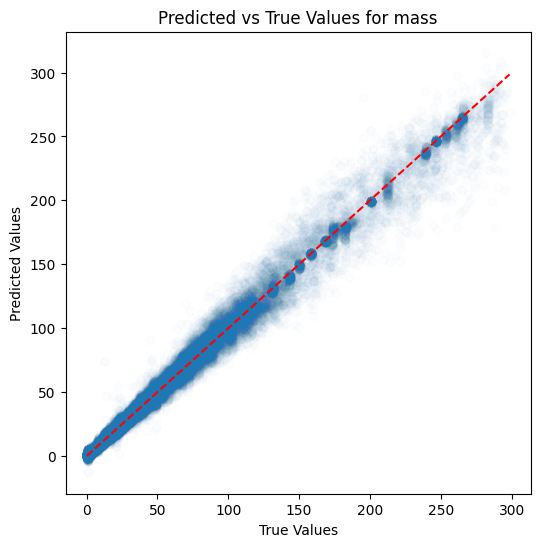

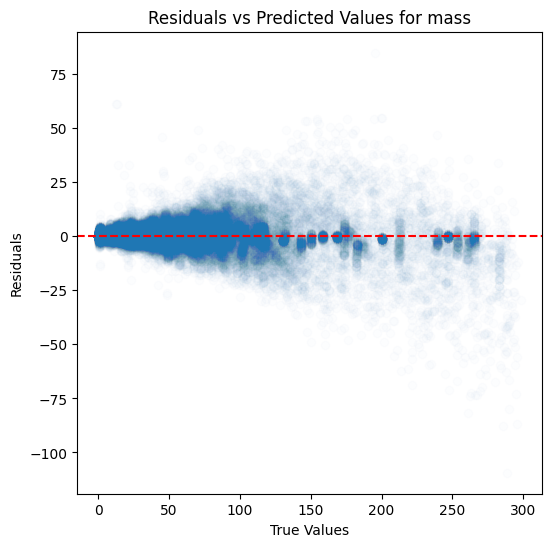

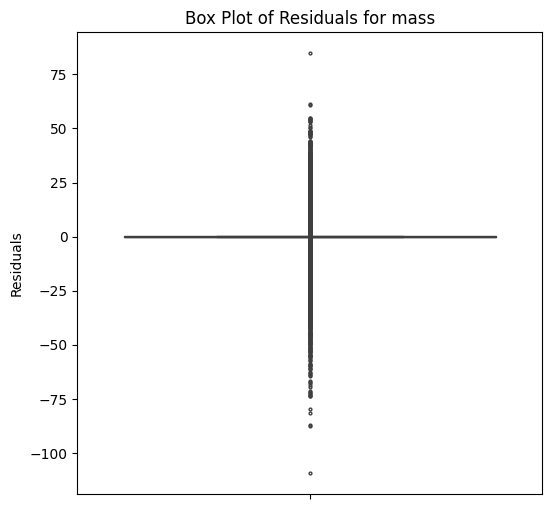

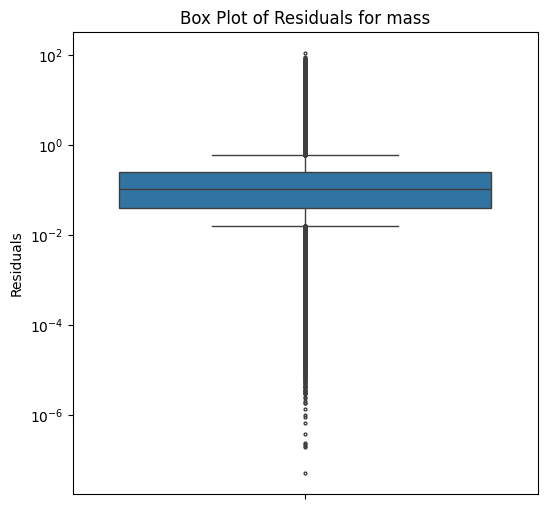

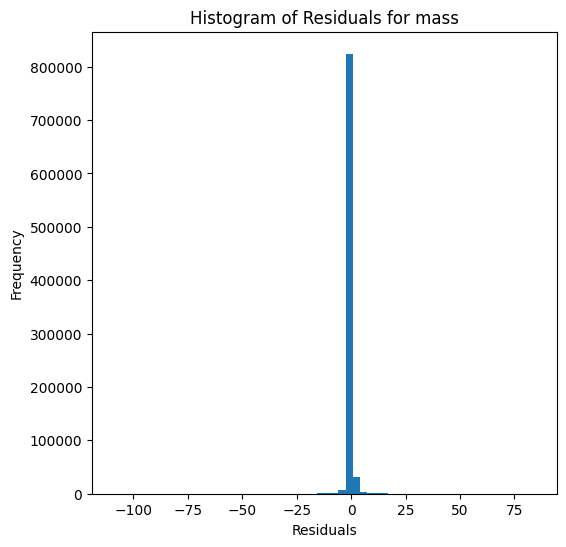

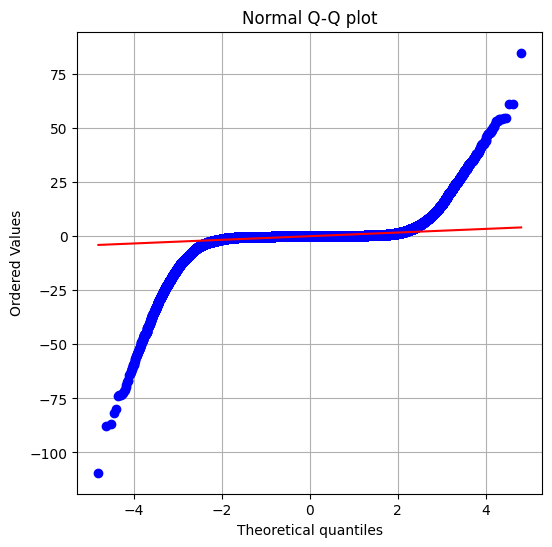


radius results:
RVE :  0.9994217483263456
RMSE :  0.02395607150171224
MAE :  0.01524043677301111
MedAE :  0.011170646564808387
CORR :  0.9997108365049165
MAX_ER :  0.5815845423411247
Percentiles : 
  75th percentile :  0.020083835454860623
  90th percentile :  0.03137351963360766
  95th percentile :  0.04060608008484646
  99th percentile :  0.06959694486312917



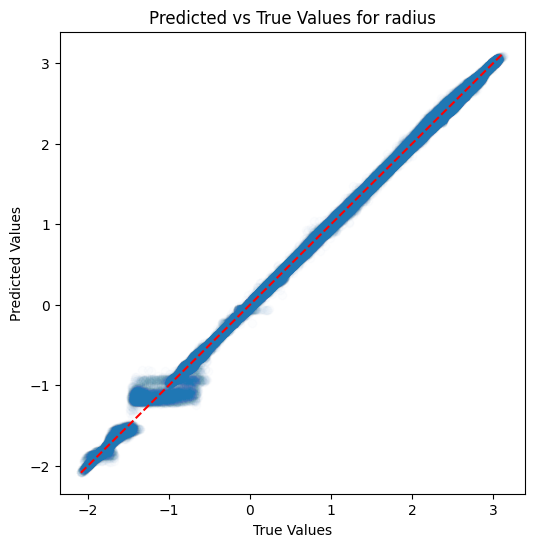

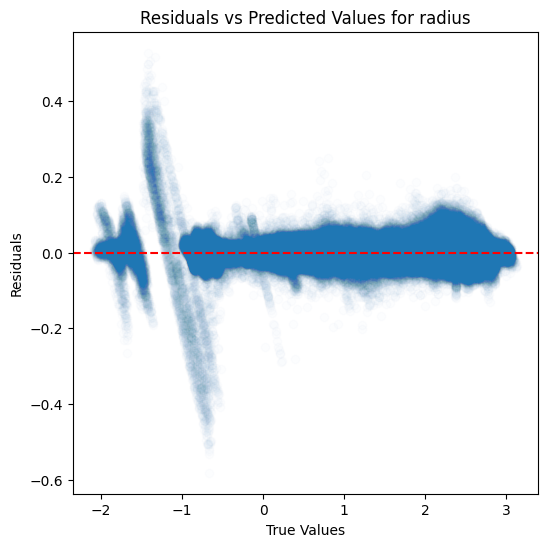

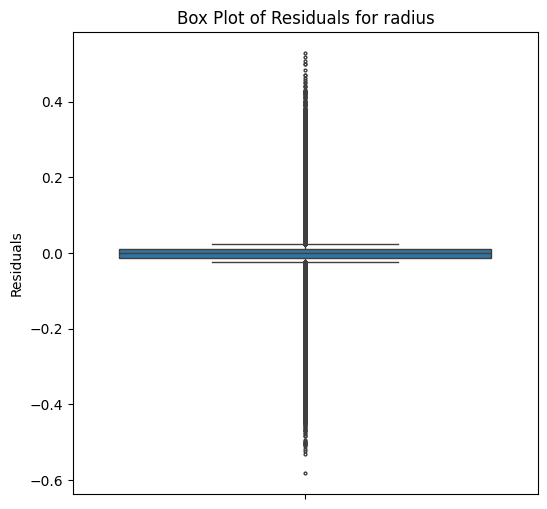

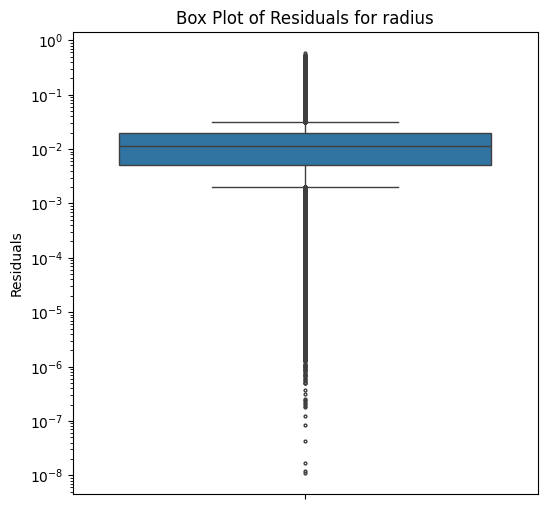

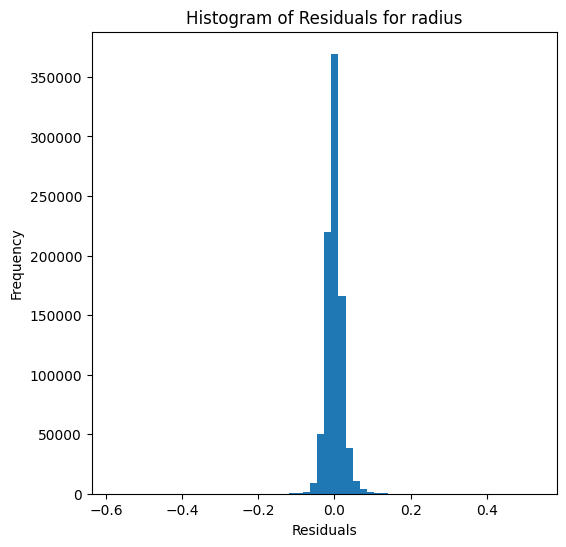

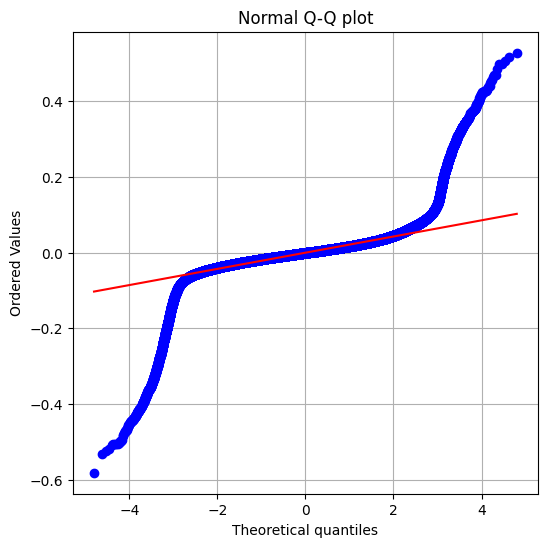

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, "../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True, n_jobs=5)

### Multi-layer perceptron

In [6]:
mlp_evaluator = Model_evaluator("mlp", path="../../../../../results/K_fold/")

In [ ]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, "../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=False, max_iter=2000)


Base train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


2 

plus de 30 minutes pour entrainer un seul split de Kfold